# PROJECT-2 - Predicting Players Rating
## By Prakash Ghosh
---

### Problem Statement -  Predicting players rating of soccer player based on their attributes

#### About the Dataset
The ultimate Soccer database for data analysis and machine learning The dataset comes in the form of an SQL database (https://www.kaggle.com/hugomathien/soccer) and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.
* +25,000 matches
* +10,000 players
* 11 European Countries with their lead championship
* Seasons 2008 to 2016
* Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
* Team line up with squad formation (X, Y coordinates)
* Betting odds from up to 10 providers
* Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

### Solution:

In [1]:
# Import Required Libraries
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import statsmodels.api as statsmodels

In [2]:
# Loading Dataset
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [3]:
# Check the atributes and row count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [4]:
# From the above info - Null values are very less - so we will remove rows with null values
df.dropna(axis=0, inplace=True)

# Check the atributes and row count after removing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

In [5]:
# Statistical analysis of data
pd.set_option("display.precision", 2) #Set the precisions
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,...,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00
mean,91995.89,166822.13,137653.15,68.64,73.48,55.14,49.96,57.26,62.49,49.49,...,57.87,54.93,46.76,50.35,48.03,14.70,15.95,20.53,16.02,16.33
std,53092.66,52821.44,137599.74,7.03,6.58,17.25,19.04,16.48,14.17,18.25,...,15.15,15.56,21.23,21.50,21.59,16.84,15.84,21.14,16.07,17.19
min,1.00,2.00,2625.00,33.00,39.00,1.00,1.00,1.00,3.00,1.00,...,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
25%,46074.25,156616.00,35451.00,64.00,69.00,45.00,34.00,49.00,57.00,35.00,...,49.00,45.00,25.00,29.00,25.00,7.00,8.00,8.00,8.00,8.00
50%,92003.50,183792.00,80291.00,69.00,74.00,59.00,53.00,60.00,65.00,52.00,...,60.00,57.00,50.00,56.00,53.00,10.00,11.00,12.00,11.00,11.00
75%,137935.75,200138.00,192841.00,73.00,78.00,68.00,65.00,68.00,72.00,64.00,...,69.00,67.00,66.00,69.00,67.00,13.00,15.00,15.00,15.00,15.00
max,183978.00,234141.00,750584.00,94.00,97.00,95.00,97.00,98.00,97.00,93.00,...,97.00,96.00,94.00,95.00,95.00,94.00,93.00,97.00,96.00,96.00


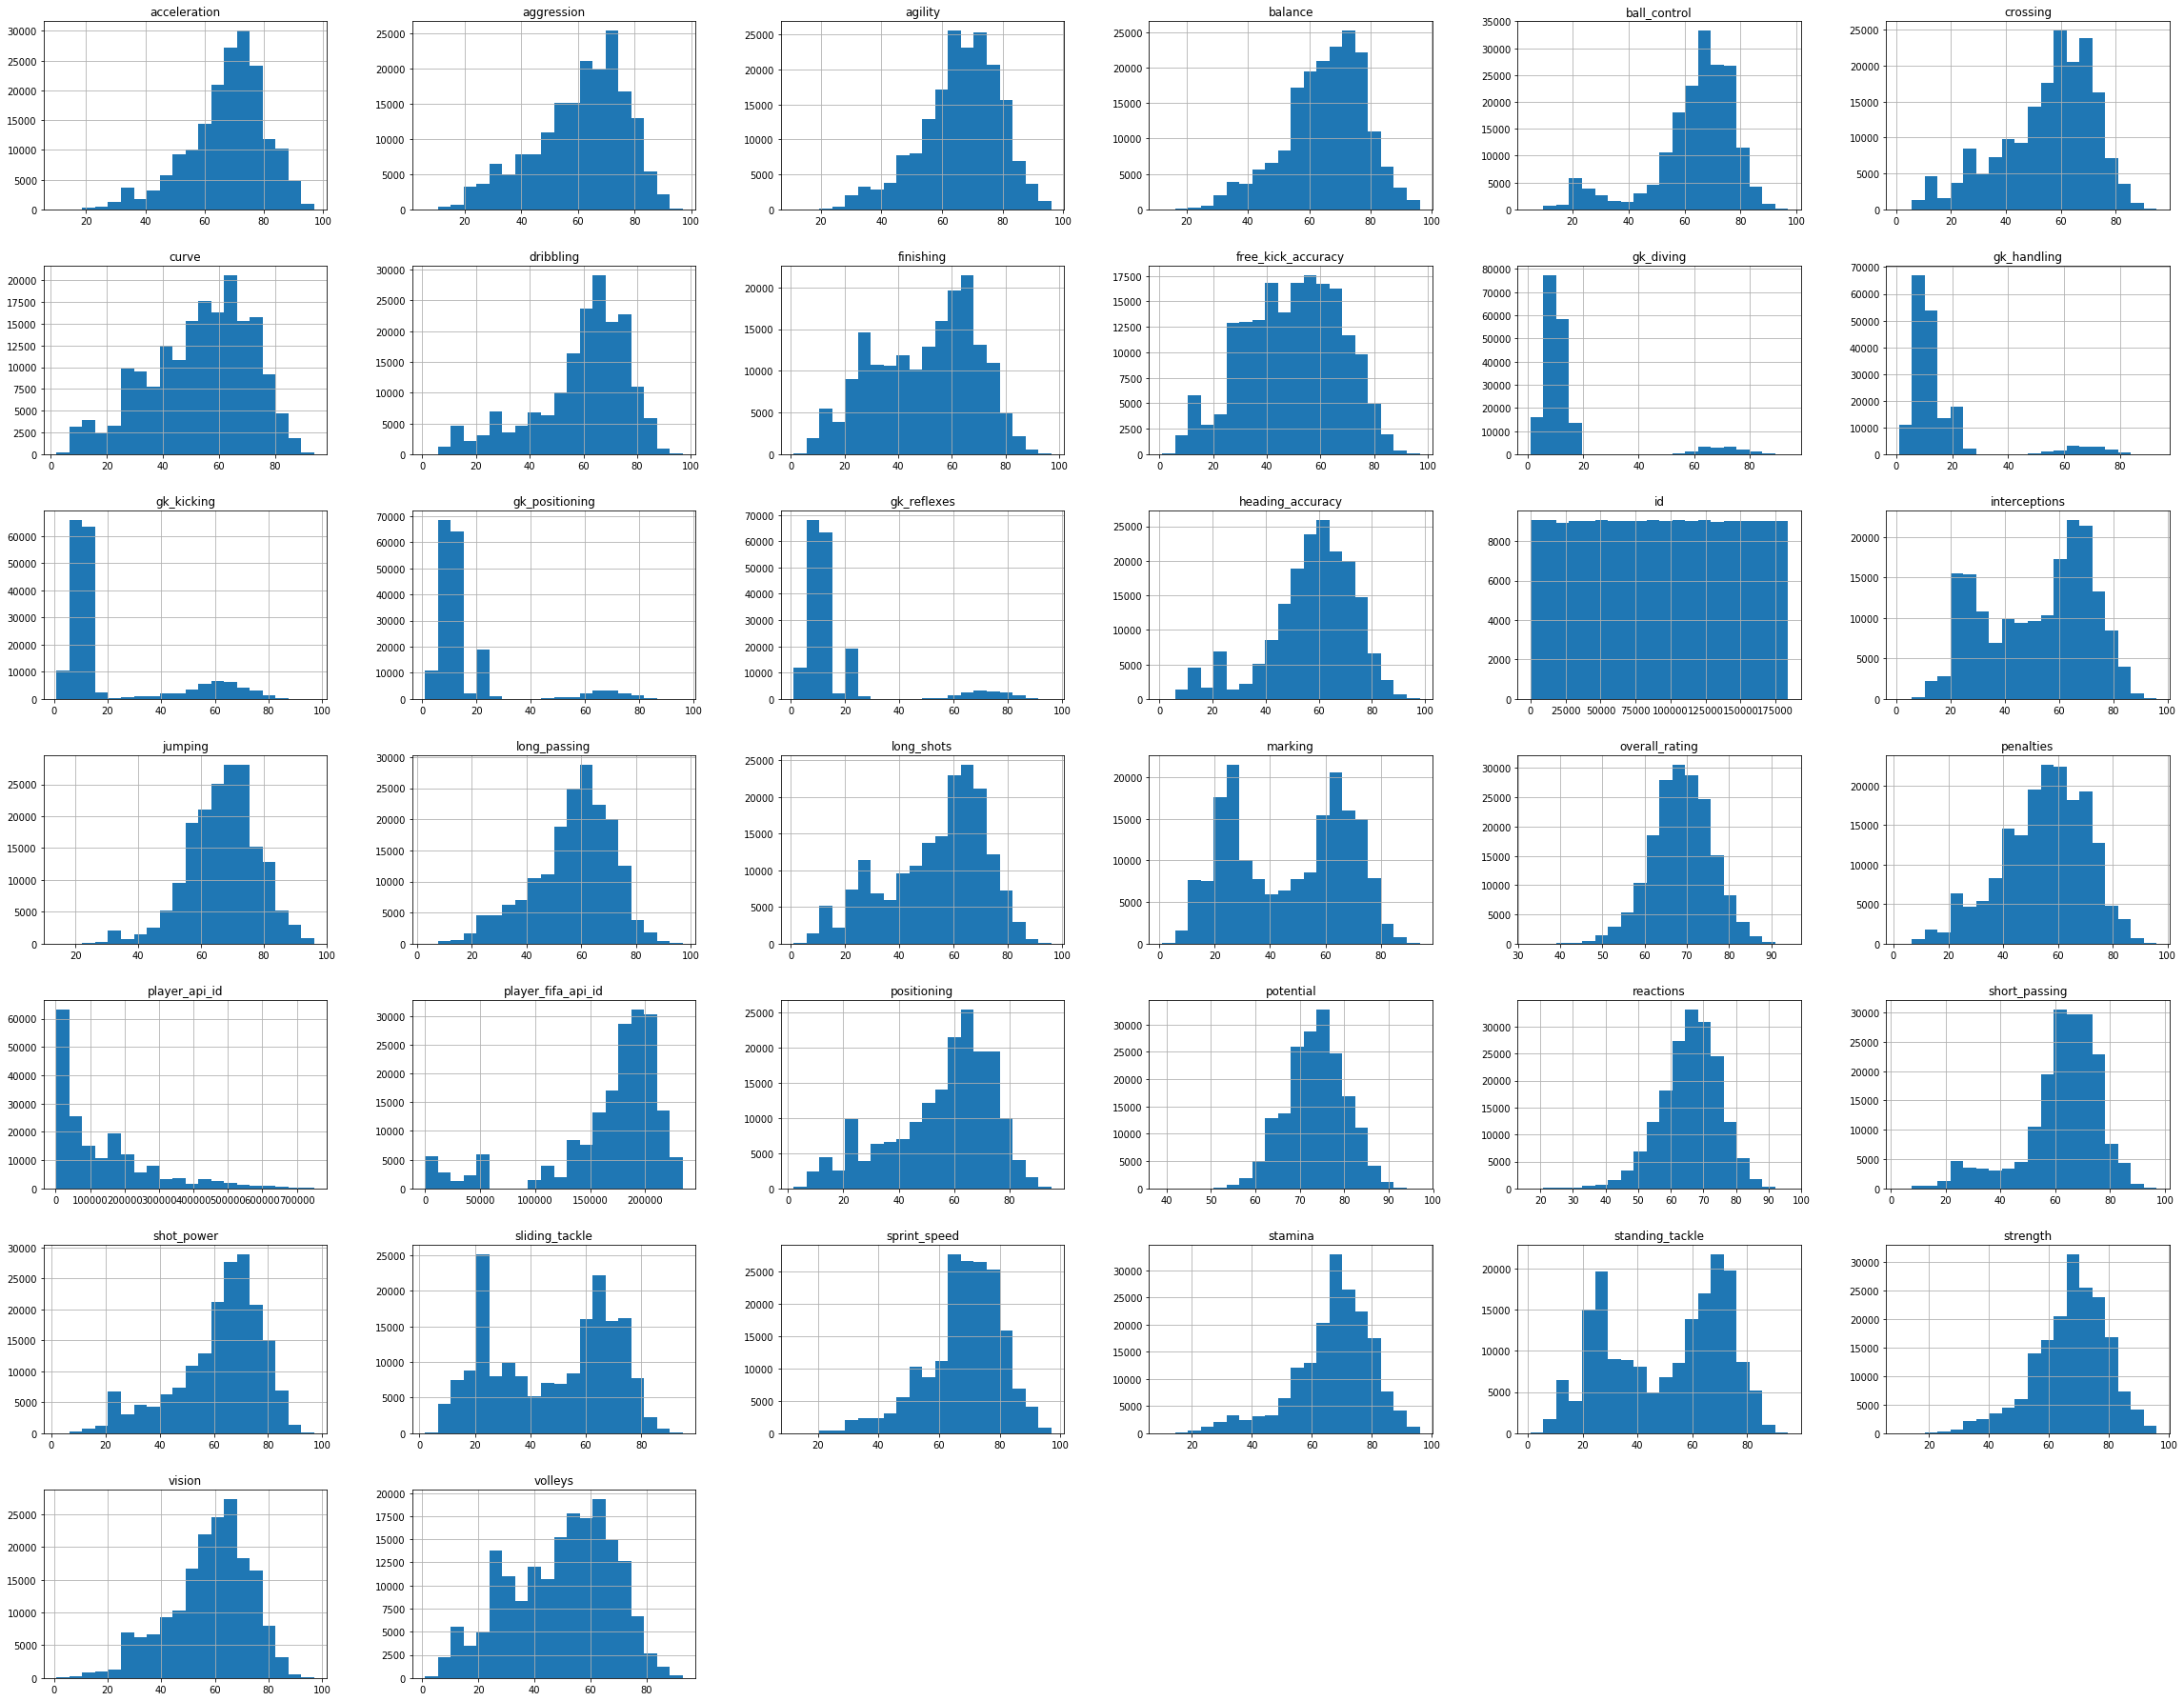

In [6]:
# Visual Analysis of the Dataset
df.hist(bins=20, figsize=(40,32))
plt.show()

In [7]:
# Corelations 
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.00e+00,3.74e-03,2.05e-03,-3.74e-03,8.37e-04,-0.02,-8.17e-03,-0.01,-6.70e-03,-6.92e-03,...,-7.93e-03,-1.18e-02,-1.03e-02,-1.25e-02,-1.11e-02,0.01,1.09e-02,8.76e-03,1.40e-02,1.47e-02
player_fifa_api_id,3.74e-03,1.00e+00,5.57e-01,-2.79e-01,-2.13e-02,-0.07,-2.98e-02,-0.10,-6.53e-02,-8.87e-02,...,-1.63e-01,-1.75e-01,-7.56e-02,-7.11e-02,-5.52e-02,-0.09,-1.39e-01,-2.48e-01,-1.41e-01,-1.32e-01
player_api_id,2.05e-03,5.57e-01,1.00e+00,-3.28e-01,1.06e-02,-0.11,-6.23e-02,-0.13,-9.02e-02,-1.31e-01,...,-1.88e-01,-1.62e-01,-8.98e-02,-8.67e-02,-7.36e-02,-0.07,-1.25e-01,-2.30e-01,-1.26e-01,-1.22e-01
overall_rating,-3.74e-03,-2.79e-01,-3.28e-01,1.00e+00,7.65e-01,0.36,3.30e-01,0.31,4.58e-01,3.62e-01,...,4.31e-01,3.93e-01,1.32e-01,1.64e-01,1.28e-01,0.03,6.72e-03,2.88e-02,8.03e-03,7.80e-03
potential,8.37e-04,-2.13e-02,1.06e-02,7.65e-01,1.00e+00,0.28,2.88e-01,0.21,3.83e-01,3.02e-01,...,3.79e-01,3.15e-01,5.41e-02,8.21e-02,6.33e-02,-0.01,5.86e-03,9.23e-02,4.47e-03,4.94e-03
crossing,-2.02e-02,-6.56e-02,-1.13e-01,3.57e-01,2.77e-01,1.00,5.77e-01,0.37,7.90e-01,6.38e-01,...,6.94e-01,5.74e-01,2.35e-01,2.85e-01,2.75e-01,-0.60,-5.96e-01,-3.57e-01,-5.98e-01,-6.02e-01
finishing,-8.17e-03,-2.98e-02,-6.23e-02,3.30e-01,2.88e-01,0.58,1.00e+00,0.37,5.80e-01,8.51e-01,...,6.52e-01,7.26e-01,-2.85e-01,-2.30e-01,-2.62e-01,-0.48,-4.65e-01,-2.92e-01,-4.71e-01,-4.73e-01
heading_accuracy,-1.18e-02,-1.04e-01,-1.30e-01,3.13e-01,2.06e-01,0.37,3.73e-01,1.00,5.48e-01,3.91e-01,...,3.36e-01,4.31e-01,4.61e-01,4.80e-01,4.41e-01,-0.67,-6.49e-01,-4.03e-01,-6.49e-01,-6.52e-01
short_passing,-6.70e-03,-6.53e-02,-9.02e-02,4.58e-01,3.83e-01,0.79,5.80e-01,0.55,1.00e+00,6.40e-01,...,7.66e-01,6.13e-01,3.50e-01,4.15e-01,3.80e-01,-0.69,-6.90e-01,-4.23e-01,-6.91e-01,-6.93e-01
volleys,-6.92e-03,-8.87e-02,-1.31e-01,3.62e-01,3.02e-01,0.64,8.51e-01,0.39,6.40e-01,1.00e+00,...,6.91e-01,7.13e-01,-1.70e-01,-1.08e-01,-1.28e-01,-0.51,-4.86e-01,-2.79e-01,-4.90e-01,-4.92e-01


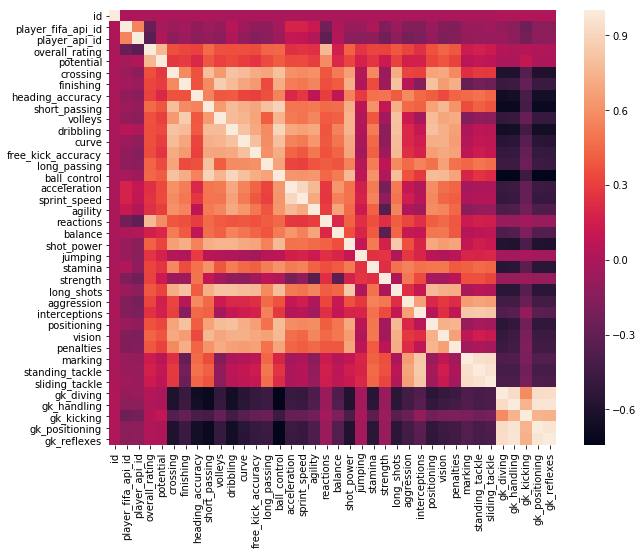

In [8]:
# Show the Coorelations in Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

<b>Observation 1:</b> All variables are positively corelated with Overall Rating except id, player_fifa_api_id, player_api_id. So these variables can be removed from the Regression Model.

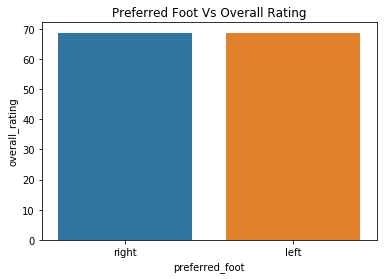

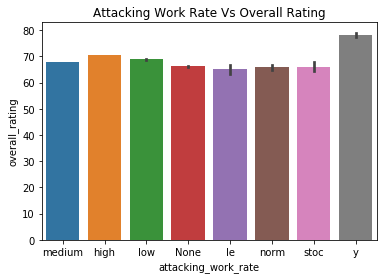

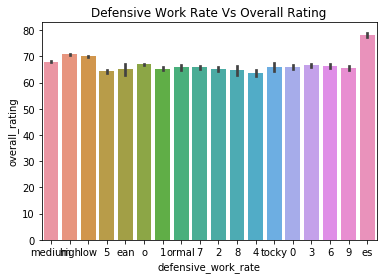

In [9]:
# Checking impact of Categorical Columns

# Impact of Preferred Foot.
sns.barplot(x='preferred_foot', y='overall_rating', data=df, estimator=np.mean)
plt.title('Preferred Foot Vs Overall Rating')
plt.show()

# Impact of Attacking Work Rate.
sns.barplot(x='attacking_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Attacking Work Rate Vs Overall Rating')
plt.show()

# Impact of Defensive Work Rate.
sns.barplot(x='defensive_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Defensive Work Rate Vs Overall Rating')
plt.show()

<b>Observation 2:</b> Here the Overall Rating is almost same for the different values of preferred_foot, attacking_work_rate, defensive_work_rate. So these variables can be removed from the Regression Model.

In [10]:
# Identifying Indipendant variables for the Model
target = ['overall_rating']            # Target variable

# To Identify the feature first we will take all column in the list then remove 
# which is not relivant (as per Observation-1 and Observation-2)
features = list(df)

features.remove('overall_rating')      # Removed as - Target Variable
features.remove('id')                  # Removed as - Observation 1
features.remove('player_fifa_api_id')  # Removed as - Observation 1
features.remove('player_api_id')       # Removed as - Observation 1
features.remove('date')                # Removed as - Observation 1

features.remove('preferred_foot')      # Removed as - Observation 2
features.remove('attacking_work_rate') # Removed as - Observation 2
features.remove('defensive_work_rate') # Removed as - Observation 2

# now the list features has Columns to be considered for Indipendant variables.
features

['potential',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [11]:
# Create Data Frame for both Target and Independant Variables.
X=df[features]
Y=df[target]

# Create a Model and Analyze stats
model = statsmodels.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.198e+06
Date:                Sat, 03 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:08:58   Log-Likelihood:            -4.4209e+05
No. Observations:              180354   AIC:                         8.842e+05
Df Residuals:                  180320   BIC:                         8.846e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
potential              0.3557      0.001    263.154      0.000       0.353       0.358
crossing               0.0221      0.001     26.238      0.000       0.020       0.024
finishing              0.0100      0.001     10.832      0.000       0.008       0.012
heading_accuracy       0.0667      0.001     81.261      0.000       0.065       0.068
short_passing          0.0460      0.001     33.197      0.000       0.043       0.049
volleys                0.0048      0.001      5.771      0.000       0.003       0.006
dribbling             -0.0127      0.001    -10.801      0.000      -0.015      -0.010
curve                  0.0112      0.001     13.877      0.000       0.010       0.013
free_kick_accuracy     0.0109      0.001     15.233      0.000       0.009       0.012
long_passing           0.0080      0.001      8.369      0.000       0.006       0.010
ball_control           0.1359      0.002     84.966      0.000       0.133       0.139
acceleration           0.0059      0.001      4.240      0.000       0.003       0.009
sprint_speed           0.0071      0.001      5.351      0.000       0.004       0.010
agility               -0.0150      0.001    -14.819      0.000      -0.017      -0.013
reactions              0.2149      0.001    197.780      0.000       0.213       0.217
balance                0.0009      0.001      1.229      0.219      -0.001       0.002
shot_power             0.0172      0.001     19.413      0.000       0.015       0.019
jumping                0.0146      0.001     19.848      0.000       0.013       0.016
stamina               -0.0060      0.001     -7.350      0.000      -0.008      -0.004
strength               0.0504      0.001     63.409      0.000       0.049       0.052
long_shots            -0.0116      0.001    -12.548      0.000      -0.013      -0.010
aggression             0.0208      0.001     30.087      0.000       0.019       0.022
interceptions          0.0142      0.001     19.106      0.000       0.013       0.016
positioning           -0.0081      0.001    -10.202      0.000      -0.010      -0.007
vision                -0.0012      0.001     -1.326      0.185      -0.003       0.001
penalties              0.0137      0.001     18.085      0.000       0.012       0.015
marking                0.0307      0.001     27.118      0.000       0.028       0.033
standing_tackle        0.0037      0.001      2.789      0.005       0.001       0.006
sliding_tackle        -0.0297      0.001    -26.719      0.000      -0.032      -0.028
gk_diving              0.1624      0.001    110.000      0.000       0.160       0.165
gk_handling            0.0292      0.002     15.130      0.000       0.025       0.033
gk_kicking            -0.0314      0.001    -50.077      0.000      -0.033      -0.030
gk_positioning         0.0511      0.0

<b>Observation 3:</b> 
* R-squared = 0.998 i.e. 99.80% . So the Model can be considered as Perfect
* For only Balance and Vision, P Values is greater than 0.05. So this two Variables are impacting on Overall Rating


#### Train and Test Split
* Train Set 70%, Test Set 30%

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
print('X_train:\t',X_train.shape)
print('Y_train:\t',Y_train.shape)
print('X_test:\t\t',X_test.shape)
print('Y_test:\t\t',Y_test.shape)

X_train:	 (126247, 34)
Y_train:	 (126247, 1)
X_test:		 (54107, 34)
Y_test:		 (54107, 1)


In [13]:
# Fitting Regression Model 
X_train = statsmodels.add_constant(X_train)
X_test = statsmodels.add_constant(X_test)

#Create a Model for Trainign Set
model_train = statsmodels.OLS(Y_train, X_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                 1.970e+04
Date:                Sat, 03 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:09:13   Log-Likelihood:            -3.0900e+05
No. Observations:              126247   AIC:                         6.181e+05
Df Residuals:                  126212   BIC:                         6.184e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5627      0.113    -31.539      0.000      -3.784      -3.341
potential              0.3777      0.002    215.331      0.000       0.374       0.381
crossing               0.0228      0.001     22.676      0.000       0.021       0.025
finishing              0.0117      0.001     10.618      0.000       0.010       0.014
heading_accuracy       0.0686      0.001     69.751      0.000       0.067       0.071
short_passing          0.0503      0.002     30.283      0.000       0.047       0.054
volleys                0.0040      0.001      4.019      0.000       0.002       0.006
dribbling             -0.0126      0.001     -9.037      0.000      -0.015      -0.010
curve                  0.0114      0.001     11.857      0.000       0.010       0.013
free_kick_accuracy     0.0115      0.001     13.479      0.000       0.010       0.013
long_passing           0.0068      0.001      5.977      0.000       0.005       0.009
ball_control           0.1346      0.002     70.594      0.000       0.131       0.138
acceleration           0.0067      0.002      4.021      0.000       0.003       0.010
sprint_speed           0.0093      0.002      5.894      0.000       0.006       0.012
agility               -0.0088      0.001     -7.244      0.000      -0.011      -0.006
reactions              0.2097      0.001    161.208      0.000       0.207       0.212
balance                0.0075      0.001      7.977      0.000       0.006       0.009
shot_power             0.0167      0.001     15.852      0.000       0.015       0.019
jumping                0.0163      0.001     18.593      0.000       0.015       0.018
stamina               -0.0060      0.001     -6.153      0.000      -0.008      -0.004
strength               0.0613      0.001     60.920      0.000       0.059       0.063
long_shots            -0.0129      0.001    -11.720      0.000      -0.015      -0.011
aggression             0.0207      0.001     25.138      0.000       0.019       0.022
interceptions          0.0128      0.001     14.354      0.000       0.011       0.014
positioning           -0.0105      0.001    -11.087      0.000      -0.012      -0.009
vision                -0.0018      0.001     -1.701      0.089      -0.004       0.000
penalties              0.0154      0.001     17.115      0.000       0.014       0.017
marking                0.0331      0.001     24.507      0.000       0.030       0.036
standing_tackle        0.0036      0.002      2.302      0.021       0.001       0.007
sliding_tackle        -0.0293      0.001    -22.133      0.000      -0.032      -0.027
gk_diving              0.1617      0.002     91.997      0.000       0.158       0.165
gk_handling            0.0346      0.002     14.990      0.000       0.030       0.039
gk_kicking            -0.0347      0.0

In [14]:
# Linear Regression 
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
pd.DataFrame({'Colum_name':X_train.columns,'Coefcient':model_lr.coef_[0]}) # show Coefcient

,Colum_name,Coefcient
0,const,1.45e-18
1,potential,3.78e-01
2,crossing,2.28e-02
3,finishing,1.17e-02
4,heading_accuracy,6.86e-02
5,short_passing,5.03e-02
6,volleys,3.98e-03
7,dribbling,-1.26e-02
8,curve,1.14e-02
9,free_kick_accuracy,1.15e-02


#### Evaluate Model Performance
* Score

In [15]:
print('Train:\t',model_lr.score(X_train,Y_train))
print('Test:\t',model_lr.score(X_test,Y_test))

Train:	 0.8414469429891789
Test:	 0.8422874996117334


Conclusion: Model Score is almost same for Test and Train. i.e. the fit is good.

* Overall rating Prediction

In [16]:
# Calcualte Prediction for Train and Test Data set
y_prediction_train= model_lr.predict(X_train)
y_prediction_test = model_lr.predict(X_test)

print('Train:\t',y_prediction_train.mean())
print('Test:\t', y_prediction_test.mean())

Train:	 68.62899712468415
Test:	 68.62829711367809


Conclusion: Overall rating Prediction is almost same for Test and Train. i.e. the fit is good.

* Prediction for RMSE

In [17]:
print('Train:\t', math.sqrt(mean_squared_error(y_prediction_train, Y_train)))
print('Test:\t' , math.sqrt(mean_squared_error(y_prediction_test, Y_test)))

Train:	 2.7972742920158433
Test:	 2.7936880375643716


Conclusion: RMSE is almost same for Test and Train. i.e. the fit is good.

* Plot using Train  Data with Residual

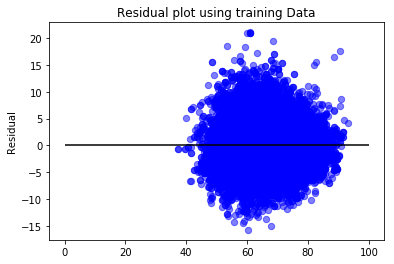

Text(0,0.5,'Residual')

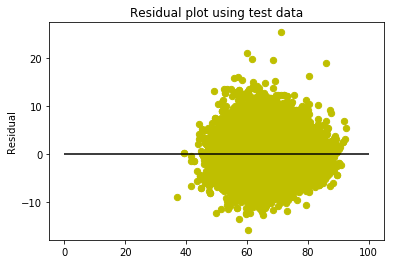

In [18]:
#plt.scatter(model_reg.predict(X_train),model_reg.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(y_prediction_train,(y_prediction_train-Y_train),c='b',s=40,alpha=0.5)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot using training Data')
plt.ylabel('Residual')
plt.show()

#Plot using Test Data with caluclated Residual
plt.scatter(y_prediction_test,(y_prediction_test-Y_test),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual plot using test data')
plt.ylabel('Residual')

<b>Conclusion:<br>
    The  residual are randomly scattered around line zero (for both Train and Test Dataset), so the Model is Perfect and Ready to use.
    
Now we will Predict Rating for a player to know overall rating by passing the features.

In [22]:
# For the inut feature we are getting feature of an random player and passing the feature 
# to get the overall rating (later we can compare with his rating as we know his rating here)
input_feature = features[:]
input_feature.insert(0, "id")

pred_overall_rating=model_lr.predict(np.array(df[input_feature][999:1000]))
print('Predicted Overall Rating:\t', pred_overall_rating)
print('Actual Overall Rating:\t\t', df['overall_rating'][999:1000].values[0])

Predicted Overall Rating:	 [[58.48234074]]
Actual Overall Rating:		 61.0
